In [1]:
#Import the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
job=pd.read_excel("C:\\Users\\weekp\\OneDrive\\Desktop\\new_job1(2).xlsx")


In [3]:
job.head()

,UG,SPECIALIZATION,INTERESTS,SKILLS,KEY_SKILL,PERCENTAGE,JOB_TYPE
0,B.Sc,Computer Applications,Cloud computing,Python;SQL;Java,Python,85.000,Software Engineer
1,B.Tech,Computer Science Engineering,Technology,Python;SQL,Python,66.500,Computer Software Engineer
2,BBA,Business Administration,Sales/Marketing,Accounting,HR,75.525,Relationship Manager
3,B.Tech,Instrumentation Engineering,Technology,PLC Allen Bradley;PLC Ladder Logic,PLC,70.680,Plant Instrumentation Engineer
4,B.Tech,Computer Science Engineering,Technology,networking,networking,73.150,Network Analyst


In [3]:
job.isna().sum()


UG                0
SPECIALIZATION    0
INTERESTS         0
SKILLS            0
KEY_SKILL         0
PERCENTAGE        0
JOB_TYPE          0
dtype: int64

In [4]:
job.columns


Index(['UG', 'SPECIALIZATION', 'INTERESTS', 'SKILLS', 'KEY_SKILL',
       'PERCENTAGE', 'JOB_TYPE'],
      dtype='object')

In [5]:
#@@@@@@@@@ CHECKING DUPLICATES
job.duplicated().sum()

4

In [6]:
job.drop_duplicates(inplace=True)

In [7]:
#@@@@@@@@ DATA PREPROCESSING
job['PERCENTAGE'] =job['PERCENTAGE'].astype(str)


In [8]:
job = job[['INTERESTS','SKILLS','PERCENTAGE','UG','SPECIALIZATION','KEY_SKILL','JOB_TYPE']]
job.head()

,INTERESTS,SKILLS,PERCENTAGE,UG,SPECIALIZATION,KEY_SKILL,JOB_TYPE
0,Cloud computing,Python;SQL;Java,85.0,B.Sc,Computer Applications,Python,Software Engineer
1,Technology,Python;SQL,66.5,B.Tech,Computer Science Engineering,Python,Computer Software Engineer
2,Sales/Marketing,Accounting,75.525,BBA,Business Administration,HR,Relationship Manager
3,Technology,PLC Allen Bradley;PLC Ladder Logic,70.68,B.Tech,Instrumentation Engineering,PLC,Plant Instrumentation Engineer
4,Technology,networking,73.15,B.Tech,Computer Science Engineering,networking,Network Analyst


# Exploratory data analysis

Text(0.5, 0, 'Interests')

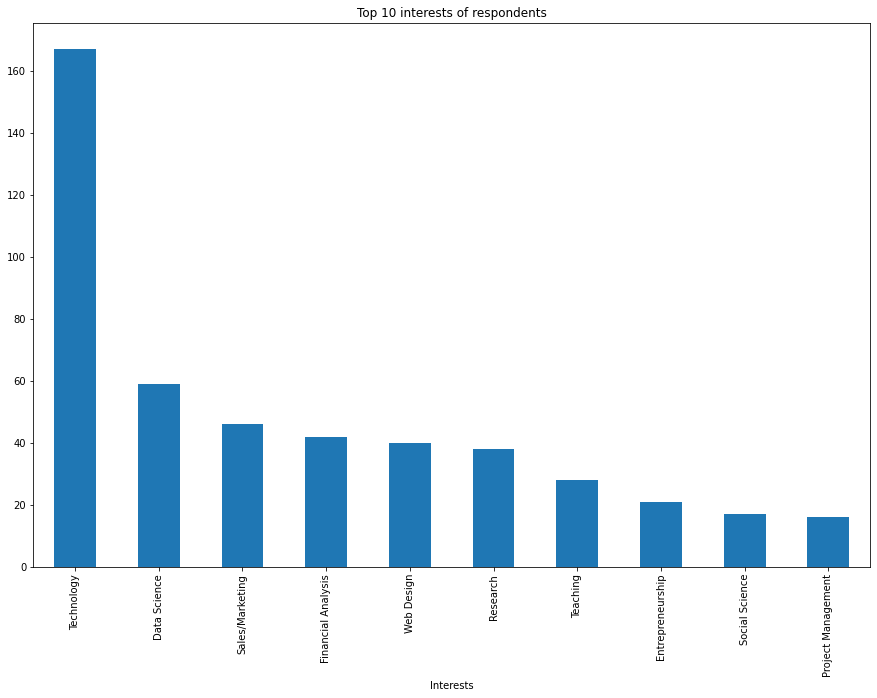

In [9]:
plt.figure(figsize=(15,10))
job['INTERESTS'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 interests of respondents')
plt.xlabel('Interests')

# From the graph we can see that Technology,Data science,sales/marketing,financial analysis and web design are among the top 5 of interests of the respondents.

Text(0.5, 0, 'Interests')

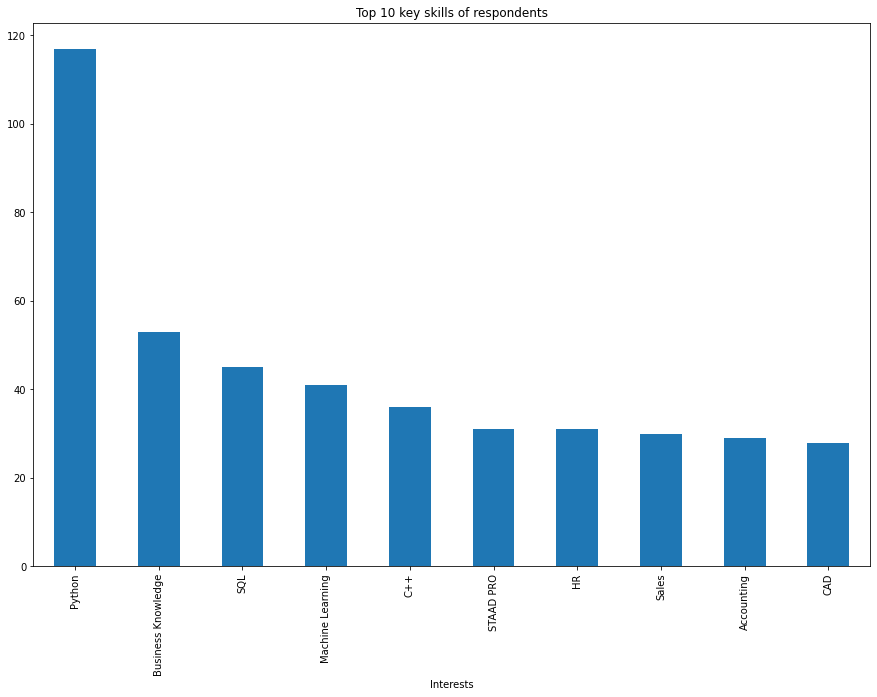

In [10]:
plt.figure(figsize=(15,10))
job['KEY_SKILL'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 key skills of respondents')
plt.xlabel('Interests')

#### From the graph we can see that Python,Business knowledge,SQL,Machine Learning and C++ are among the top 5 of key skills of the respondents.

In [35]:

pip install researchpy


Note: you may need to restart the kernel to use updated packages.


In [11]:
import researchpy as rp

In [12]:
ctab,chitest,expected=rp.crosstab(job['JOB_TYPE'],job['KEY_SKILL'],margins=False, test='chi-square',expected_freqs=True)

In [13]:
print(ctab)
print(chitest)
print(expected)

                                   KEY_SKILL                             \
KEY_SKILL                                AWS Accounting Agile Animation   
JOB_TYPE                                                                  
\nBiocurator                               0          0     0         0   
\nHardware Design Engineer                 0          0     0         0   
\nProgrammer Analyst                       0          0     0         0   
ASE                                        1          0     0         0   
ASP.NET Developer                          0          0     0         0   
...                                      ...        ...   ...       ...   
Web Developer and Digital Marketer         0          0     0         0   
Web developer                              0          0     0         0   
iOS Developer                              0          0     0         0   
litigation                                 0          0     0         0   
supervisor               

#### Since Cramer's V = 0.7812 so jobtype and keyskill are strongly correlated

In [14]:
ctab,chitest,expected=rp.crosstab(job['JOB_TYPE'],job['INTERESTS'],margins=False, test='chi-square',expected_freqs=True)

In [15]:
print(ctab)
print(chitest)
print(expected)

                                                           INTERESTS  \
INTERESTS                          Accounting and Financial Analysis   
JOB_TYPE                                                               
\nBiocurator                                                       0   
\nHardware Design Engineer                                         0   
\nProgrammer Analyst                                               0   
ASE                                                                0   
ASP.NET Developer                                                  0   
...                                                              ...   
Web Developer and Digital Marketer                                 0   
Web developer                                                      0   
iOS Developer                                                      0   
litigation                                                         0   
supervisor                                                      

#### Since Cramer's V = 0.7660 so jobtype and Interets are strongly correlated

In [16]:
ctab,chitest,expected=rp.crosstab(job['JOB_TYPE'],job['UG'],margins=False, test='chi-square',expected_freqs=True)

In [17]:
print(ctab)
print(chitest)
print(expected)

                                       UG                                      \
UG                                 B.Arch B.Com B.Pharma B.Sc B.Tech BA BALLB   
JOB_TYPE                                                                        
\nBiocurator                            0     0        0    0      1  0     0   
\nHardware Design Engineer              0     0        0    0      1  0     0   
\nProgrammer Analyst                    0     0        0    0      2  0     0   
ASE                                     0     0        0    0      1  0     0   
ASP.NET Developer                       0     0        0    0      2  0     0   
...                                   ...   ...      ...  ...    ... ..   ...   
Web Developer and Digital Marketer      0     0        0    0      0  0     0   
Web developer                           0     0        0    0      1  0     0   
iOS Developer                           0     0        0    4      0  0     0   
litigation                  

#### Since Cramer's V = 0.8724 so jobtype and UG are strongly correlated

In [18]:
ctab,chitest,expected=rp.crosstab(job['JOB_TYPE'],job['SPECIALIZATION'],margins=False, test='chi-square',expected_freqs=True)

In [19]:
print(ctab)
print(chitest)
print(expected)

                                   SPECIALIZATION                         \
SPECIALIZATION                        Accountancy Animation Architecture   
JOB_TYPE                                                                   
\nBiocurator                                    0         0            0   
\nHardware Design Engineer                      0         0            0   
\nProgrammer Analyst                            0         0            0   
ASE                                             0         0            0   
ASP.NET Developer                               0         0            0   
...                                           ...       ...          ...   
Web Developer and Digital Marketer              0         0            0   
Web developer                                   0         0            0   
iOS Developer                                   0         0            0   
litigation                                      0         0            0   
supervisor  

#### Since Cramer's V = 0.7978 so jobtype and specialization are strongly correlated

#### Model Building

In [20]:
# combining all columns in one Tags column
job['TAGS'] = job['INTERESTS'] + " " + job['SKILLS'] + " " + job['PERCENTAGE'] + " " + job['UG'] + " " + job['SPECIALIZATION'] + " " + job['KEY_SKILL']
job['TAGS'].head(1)

0    Cloud computing Python;SQL;Java 85.0 B.Sc Comp...
Name: TAGS, dtype: object

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')

In [22]:
cv.fit_transform(job['TAGS']).toarray().shape

(709, 522)

In [23]:
vectors = cv.fit_transform(job['TAGS']).toarray()

In [24]:
cv.get_feature_names()

C:\Users\weekp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['01',
 '015',
 '02',
 '025',
 '03',
 '05',
 '055',
 '075',
 '08',
 '085',
 '09',
 '095',
 '115',
 '125',
 '13',
 '15',
 '155',
 '16',
 '175',
 '185',
 '195',
 '21',
 '22',
 '25',
 '265',
 '27',
 '275',
 '285',
 '29',
 '295',
 '2d',
 '315',
 '32',
 '33',
 '335',
 '35',
 '36',
 '365',
 '37',
 '375',
 '39',
 '3d',
 '41',
 '42',
 '435',
 '44',
 '45',
 '455',
 '46',
 '47',
 '475',
 '49',
 '495',
 '50',
 '51',
 '515',
 '52',
 '525',
 '53',
 '54',
 '545',
 '55',
 '56',
 '565',
 '57',
 '58',
 '585',
 '59',
 '595',
 '60',
 '61',
 '615',
 '62',
 '625',
 '63',
 '635',
 '64',
 '65',
 '66',
 '67',
 '675',
 '68',
 '685',
 '69',
 '695',
 '70',
 '705',
 '71',
 '72',
 '725',
 '73',
 '74',
 '745',
 '75',
 '76',
 '765',
 '77',
 '775',
 '78',
 '79',
 '795',
 '80',
 '81',
 '82',
 '83',
 '835',
 '84',
 '85',
 '86',
 '87',
 '875',
 '88',
 '89',
 '90',
 '905',
 '91',
 '92',
 '94',
 '95',
 '955',
 '96',
 '965',
 '975',
 '98',
 '985',
 '99',
 '995',
 'accountancy',
 'accounting',
 'accountingbusiness',
 'accou

#### STEMMING

In [27]:
pip install nltk

In [25]:
import nltk

In [26]:
from nltk.stem.porter import PorterStemmer

In [27]:
ps = PorterStemmer()

In [28]:
def stem(text):
   y = []
    
   for i in text.split():
        y.append(ps.stem(i))
        
   return " ".join(y)
job['TAGS'].apply(stem)

0      cloud comput python;sql;java 85.0 b.sc comput ...
1      technolog python;sql 66.5 b.tech comput scienc...
2      sales/market account 75.525 bba busi administr hr
3      technolog plc allen bradley;plc ladder logic 7...
4      technolog network 73.15 b.tech comput scienc e...
                             ...                        
708    project manag product management;project resou...
709    technolog ;data visual ( power bi/ tableau ) 6...
710    technolog python,sql 72.2 b.tech electron and ...
711    anim and visual effect data visualization;sql ...
712    anim and visual effect 2d/3d anim 76.285 b.sc ...
Name: TAGS, Length: 709, dtype: object

In [29]:
data_new=job[['INTERESTS','TAGS','JOB_TYPE','SPECIALIZATION','UG','KEY_SKILL']]

#### COSINE SIMILARITY MODEL

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

In [31]:
similarity = cosine_similarity(vectors)

In [32]:
def recommend(new_job):
    job_index = data_new[data_new['KEY_SKILL'] == new_job].index[0]
    distances = similarity[job_index]

    job_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:10]
    
    for i in job_list:
        print(data_new.iloc[i[0]].JOB_TYPE)
        
recommend('Python')

iOS Developer
Application Programmer
Software Engineer
Data Analyst
Software Tester
Data Analyst
Computer Software Engineer
Software Engineer
Saleforce developer


In [33]:
def recommend(new_job):
    job_index = data_new[data_new['INTERESTS'] == new_job].index[0]
    distances = similarity[job_index]

    job_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:10]
    
    for i in job_list:
        print(data_new.iloc[i[0]].JOB_TYPE)

In [34]:
def recommend(new_job):
    job_index = data_new[data_new['SPECIALIZATION'] == new_job].index[0]
    distances = similarity[job_index]

    job_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:10]
    
    for i in job_list:
        print(data_new.iloc[i[0]].JOB_TYPE)

In [35]:
def recommend(new_job):
    job_index = data_new[data_new['UG'] == new_job].index[0]
    distances = similarity[job_index]

    job_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:10]
    
    for i in job_list:
        print(data_new.iloc[i[0]].JOB_TYPE)

In [36]:
import pickle


In [37]:
data_new.to_dict()

{'INTERESTS': {0: 'Cloud computing',
  1: 'Technology',
  2: 'Sales/Marketing',
  3: 'Technology',
  4: 'Technology',
  5: 'Technology',
  6: 'Technology',
  7: 'Technology',
  8: 'Sales/Marketing',
  9: 'Research',
  10: 'Entrepreneurship',
  11: 'Technology',
  12: 'Teaching',
  13: 'Technology',
  14: 'Technology',
  15: 'Financial Analysis',
  16: 'Teaching',
  17: 'Market reserach',
  18: 'Designing',
  19: 'Financial Analysis',
  20: 'Sales/Marketing',
  21: 'VLSI Technology',
  22: 'Research',
  23: 'Technology',
  24: 'Sales/Marketing',
  25: 'Web Design',
  26: 'Web Design',
  27: 'Trading',
  28: 'Research',
  29: 'Home interior design',
  30: 'Take risk for Profits',
  31: 'Entrepreneurship',
  32: 'Research',
  33: 'Blockchain',
  34: 'Web Design',
  35: 'Supply Chain Analysis',
  36: 'Cloud computing',
  37: 'Financial Analysis',
  38: 'Designing',
  39: 'Technology',
  40: 'IT field\xa0',
  41: 'Blockchain',
  42: 'Research',
  43: 'Supply Chain Analysis',
  44: 'Technolo

In [38]:
pickle.dump(data_new.to_dict(),open('G:\My Drive\pythonProject\pythonProject\Job Recommendation engine\\job1_dict.pkl','wb'))

In [39]:
pickle.dump(similarity,open('G:\My Drive\pythonProject\pythonProject\Job Recommendation engine\\similarity1.pkl','wb')) 